# Распределение Максвелла

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D0%BA%D1%81%D0%B2%D0%B5%D0%BB%D0%BB%D0%B0#%D0%92%D1%8B%D0%B2%D0%BE%D0%B4_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%9C%D0%B0%D0%BA%D1%81%D0%B2%D0%B5%D0%BB%D0%BB%D1%83

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Первая часть

среднее =  1.59576912161 дисперсия =  0.45352091053


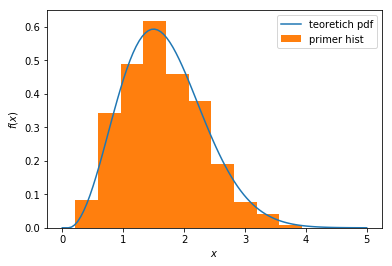

In [5]:
mean, var, skew, kurt = sts.maxwell.stats(moments='mvsk')
print 'среднее = ' , mean, 'дисперсия = ', var

maxwell = sts.maxwell(0.1, 0.99)
primer = maxwell.rvs(1000)

x = np.linspace(0, 5, 100)

# теоретическая плотность распределения
pdf = maxwell.pdf(x)

plt.plot(x, pdf, label='teoretich pdf')
plt.hist(primer, label='primer hist',normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

## Вторая часть

In [3]:
# функция, возвращающая массив средних значений из некоторого числа выборок
# razmer - размер выборки, count - число выборок
def get_primer (razmer, count):
    result = []
    for i in range(0, count):
        avg = np.mean(maxwell.rvs(razmer))
        result.append(avg)
    return result

# функция, возвращающая нормальное распределение, апроксимирующее выборочное среднее
def approx_primer_mean(razmer):
    mean = maxwell.mean()
    var = maxwell.var()
    return sts.norm(loc=mean, scale= np.sqrt(var / razmer))

# диапазон, на котором будут определяться аппроксимирующие функции
x = np.linspace(0,5,100)

razmer_vyborki = [5, 10, 50]

# произвести расчёт, показать гистограмму выборки и аппроксимирующую функцию
def show_result(n):
    plt.figure(n)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    primer = get_primer(n, 1000)
    # построить гистограмму по сэмплу
    hist_label = 'Sample mean, N=' + str(razmer)
    plt.hist(primer, bins=12, label=hist_label, normed=True)
    approx_primer = approx_primer_mean(n)
    # построить аппроксимирующую функцию
    plt.plot(x, approx_primer.pdf(x), label='Normal distribution')
    plt.legend()
    plt.show()

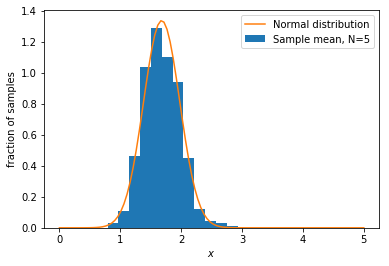

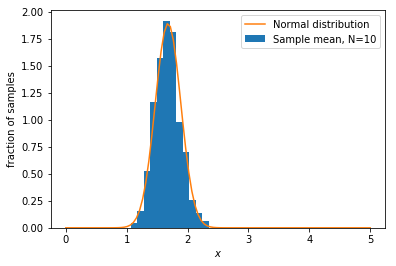

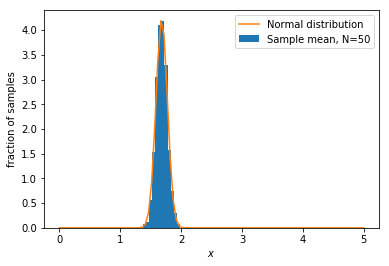

In [4]:
for razmer in razmer_vyborki:
    show_result(razmer)

## Вывод

Центральная предельная теорема утверждает, что нормальная аппроксимация является хорошим приближением распределения выборочных средних вне зависимости от формы функции распределения. Данные примеры подтверждают гипотезу для случая экспотенциального распределения. Также точность аппроксимации увеличивается с увеличением размера выборок.